Part of [Neural Network Notebook (3nb)](http://ekaakurniawan.github.io/3nb/) project.

> Copyright (C) 2014  Eka A. Kurniawan
>
> eka.a.kurniawan(ta)gmail(tod)com
>
> This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.
>
> This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
>
> You should have received a copy of the GNU General Public License along with this program.  If not, see <http://www.gnu.org/licenses/>.

### Tested On

In [1]:
import sys
print("Python %d.%d.%d" % (sys.version_info.major, \
                           sys.version_info.minor, \
                           sys.version_info.micro))

Python 3.5.2


In [2]:
import numpy as np
print("NumPy %s" % np.__version__)

NumPy 1.11.1


In [3]:
# Display graph inline
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
print("matplotlib %s" % matplotlib.__version__)

matplotlib 1.5.1


### Display Settings

In [4]:
# Display graph in 'retina' format for Mac with retina display. Others, use PNG or SVG format.
%config InlineBackend.figure_format = 'retina'
#%config InlineBackend.figure_format = 'PNG'
#%config InlineBackend.figure_format = 'SVG'

### Housekeeping Functions

Following function plots different concentrations used to visualize dose-response relation.

In [5]:
def plot_concentration(c):
    fig = plt.figure()
    
    sp111 = fig.add_subplot(111)
    # Display grid
    sp111.grid(True, which = 'both')
    # Plot concentration
    len_c = len(c)
    sp111.plot(np.linspace(0,len_c-1,len_c), c, color = 'gray', linewidth = 2)
    # Label
    sp111.set_ylabel('Concentration (nM)')
    
    # Set X axis within different concentration
    plt.xlim([0, len_c-1])
    
    plt.show()

Following function plots dose-response relation in both linear (`log_flag = False`) and logarithmic (`log_flag = True`) along X axis.

In [6]:
# d        : Dose
# r1       : First response data
# r1_label : First response label
# r2       : Second response data
# r2_label : Second response label
# log_flag : Selection for linear or logarithmic along X axis
#             - False: Plot linear (default)
#             - True: Plot logarithmic
def plot_dose_response_relation(d, r1, r1_label, r2 = None, r2_label = "", log_flag = False):
    fig = plt.figure()
    
    sp111 = fig.add_subplot(111)
    # Handle logarithmic along X axis
    if log_flag:
        sp111.set_xscale('log')
    # Display grid
    sp111.yaxis.set_ticks([0.0, 0.5, 1.0])
    sp111.grid(True, which = 'both')
    # Plot dose-response
    sp111.plot(d, r1, color = 'blue', label = r1_label, linewidth = 2)
    if r2 is not None:
        sp111.plot(d, r2, color = 'red', label = r2_label, linewidth = 2)
    # Labels
    sp111.set_ylabel('Response')
    sp111.set_xlabel('Concentration (nM)')
    # Legend
    sp111.legend(loc='upper left')
    
    # Set Y axis in between 0 and 1
    plt.ylim([0, 1])
    
    plt.show()

---

# Dose-Response Relations $^{[1]}$

Generally, dose-response relations can be written as follow. In which the dose is represented as concentration ($c$), while the formula returns the response ($r$).

$$r = \frac{F.c^{n_H}}{{c^{n_H} + EC_{50}^{n_H}}}$$

Other terms like $EC_{50}$ is the effective concentration achieved at 50% of maximum response. Normally, efficacy ($F$) is normalized to one so that it is easier to make comparison among different drugs. Furthermore, if full agonist is defined to have efficacy equal to one, anything lower than one is treated to be partial agonist. Finally, Hill coefficients ($n_H$) defines the number of drug molecules needed to activate target receptor.

### Drug Concentartion

Both linearly and logarithmically increased concentrations are used to study dose-response relations.

* Linearly increased concentration (`c_lin`):

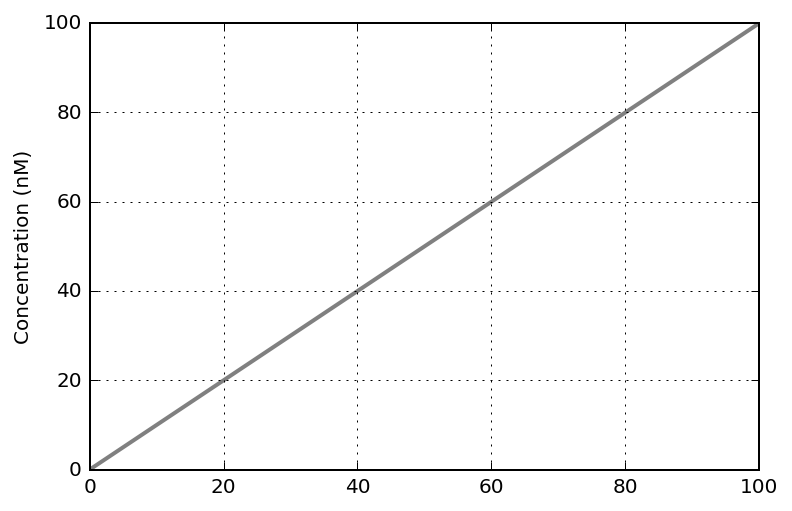

In [7]:
c_lin = np.linspace(0,100,101) # Drug concentration in nanomolar (nM)
plot_concentration(c_lin)

* Logarithmically increased concentration (`c_log`):

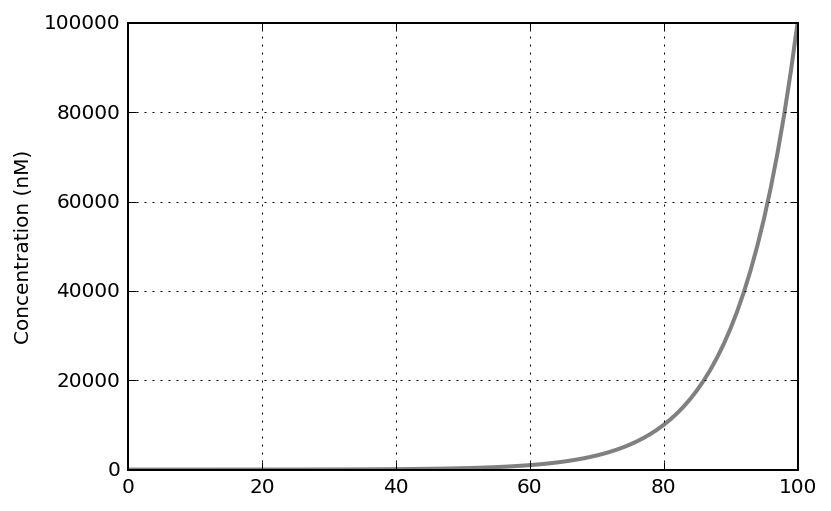

In [8]:
c_log = np.logspace(0,5,101)   # Drug concentration in nanomolar (nM)
plot_concentration(c_log)

### Agonist Only

To calculate dose-response relation in the case of agonist only, we use general dose-response relation equation described previously. The function is shown below.

In [9]:
# Calculate dose-response relation (DRR) for agonist only
# c     : Drug concentration(s) in nanomolar (nM)
# EC_50 : 50% effective concentration in nanomolar (nM)
# F     : Efficacy (unitless)
# n_H   : Hill coefficients (unitless)
def calc_drr(c, EC_50 = 20, F = 1, n_H = 1):
    r = (F * (c ** n_H) / ((c ** n_H) + (EC_50 ** n_H)))
    return r

Following result shows drug response of agonist only to the linearly increased concentrations.

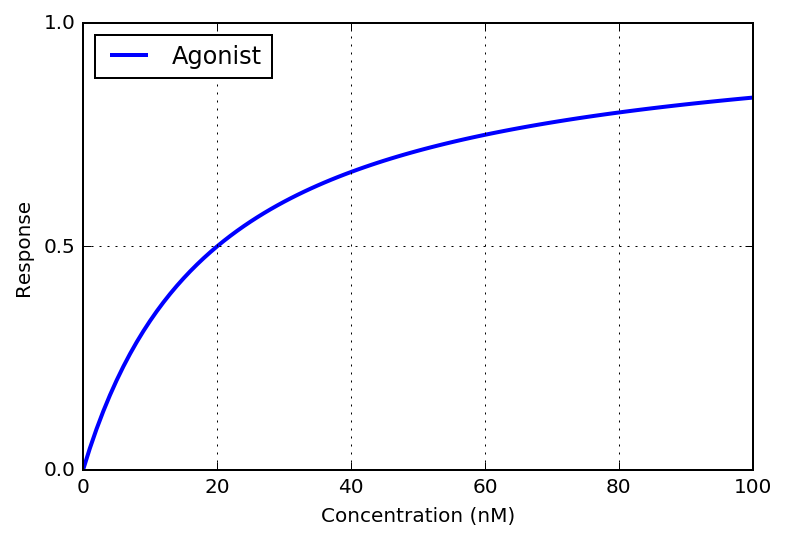

In [10]:
c = c_lin   # Drug concentration(s) in nanomolar (nM)
EC_50 = 20  # 50% effective concentration in nanomolar (nM)
F = 1       # Efficacy (unitless)
n_H = 1     # Hill coefficients (unitless)
r = calc_drr(c, EC_50, F, n_H)
plot_dose_response_relation(c, r, "Agonist")

Following result shows drug response of agonist only to the logarithmically increased concentrations.

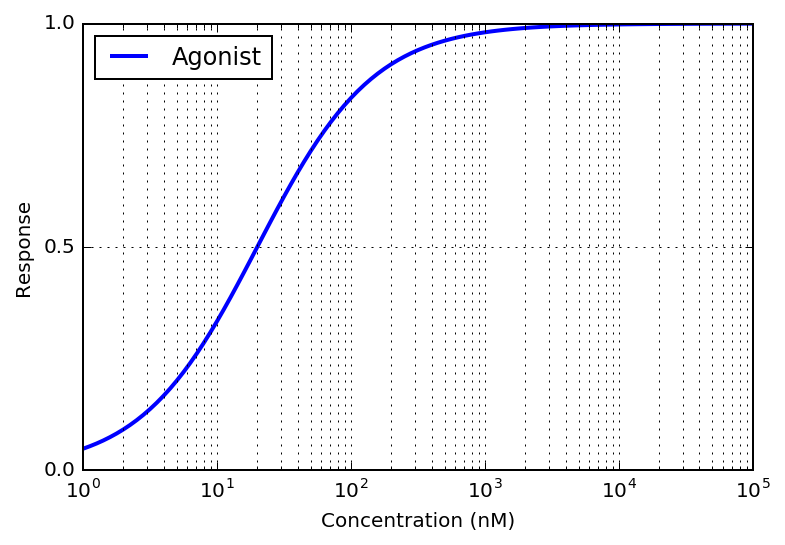

In [11]:
c = c_log   # Drug concentration(s) in nanomolar (nM)
EC_50 = 20  # 50% effective concentration in nanomolar (nM)
F = 1       # Efficacy (unitless)
n_H = 1     # Hill coefficients (unitless)
r = calc_drr(c, EC_50, F, n_H)
plot_dose_response_relation(c, r, "Agonist", log_flag = True)

### Agonist Plus Competitive Antagonist

Compatitive antagonist, as the name sugest, competes with agonist molecules to sit in the same pocket. It makes the binding harder for agonist as well as to trigger the activation. Therefore, higher agonist concentration is required to reach both full and partial (like $EC_{50}$) activation. New $EC_{50}$ value, called $EC_{50}'$ ($EC_{50}$ prime) is calculated using following formula.

$$EC_{50}' = EC_{50} * \left(1 + \frac{c_i}{K_i}\right)$$

It depends on inhibitor concentration ($c_i$) and dissociation constant of the inhibitor ($K_i$).

Following is a new function to calculate drug response of agonist with competitive antagonist. It shows new $EC_{50}$ value (`EC_50_prime`) replacing agonist only $EC_{50}$ value (`EC_50`).

In [12]:
# Calculate dose-response relation (DRR) for agonist plus competitive antagonist
#  - Agonist
#    c     : Drug concentration(s) in nanomolar (nM)
#    EC_50 : 50% effective concentration in nanomolar (nM)
#    F     : Efficacy (unitless)
#    n_H   : Hill coefficients (unitless)
#  - Antagonist
#    K_i   : Dissociation constant of inhibitor in nanomolar (nM)
#    c_i   : Inhibitor concentration in nanomolar (nM)
def calc_drr_agonist_cptv_antagonist(c, EC_50 = 20, F = 1, n_H = 1, K_i = 5, c_i = 25):
    EC_50_prime = EC_50 * (1 + (c_i / K_i))
    r = calc_drr(c, EC_50_prime, F, n_H)
    return r

Following result shows drug response of agonist with competitive antagonist to the linearly increased concentrations.

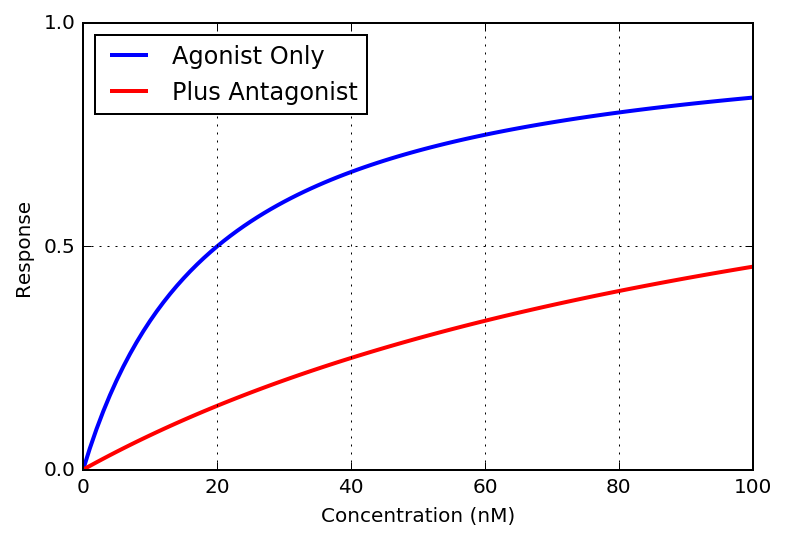

In [13]:
c = c_lin   # Drug concentration(s) in nanomolar (nM)
EC_50 = 20  # 50% effective concentration in nanomolar (nM)
F = 1       # Efficacy (unitless)
n_H = 1     # Hill coefficients (unitless)
r_a = calc_drr(c, EC_50, F, n_H)

K_i = 5     # Dissociation constant of inhibitor in nanomolar (nM)
c_i = 25    # Inhibitor concentration in nanomolar (nM)
r_aca = calc_drr_agonist_cptv_antagonist(c, EC_50, F, n_H, K_i, c_i)

plot_dose_response_relation(c, r_a, "Agonist Only", r_aca, "Plus Antagonist")

Following result shows drug response of agonist with competitive antagonist to the logarithmically increased concentrations.

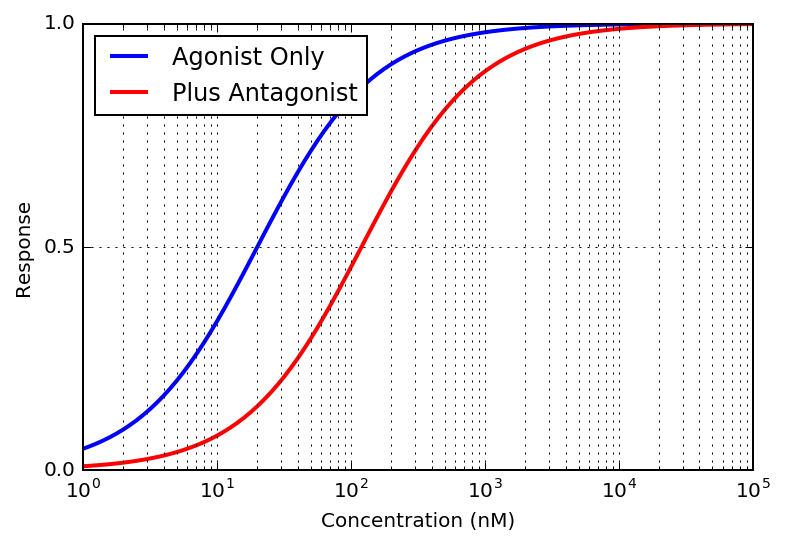

In [14]:
c = c_log   # Drug concentration(s) in nanomolar (nM)
EC_50 = 20  # 50% effective concentration in nanomolar (nM)
F = 1       # Efficacy (unitless)
n_H = 1     # Hill coefficients (unitless)
r_a = calc_drr(c, EC_50, F, n_H)

K_i = 5     # Dissociation constant of inhibitor in nanomolar (nM)
c_i = 25    # Inhibitor concentration in nanomolar (nM)
r_aca = calc_drr_agonist_cptv_antagonist(c, EC_50, F, n_H, K_i, c_i)

plot_dose_response_relation(c, r_a, "Agonist Only", r_aca, "Plus Antagonist", log_flag = True)

### Agonist Plus Noncompetitive Antagonist

Unlike competitive antagonist, noncompetitive antagonist does not compete directly to the location where agonist binds but somewhere else in the subsequent pathway. Instead of altering effective concentration (like $EC_{50}$), noncompetitive antagonist affects efficacy. New efficacy value ($F'$) due to the existance of noncompetitive antagonist is calculated as follow.

$$F' = \frac{F}{\left(1 + \frac{c_i}{K_i}\right)}$$

Following is a new function to calculate drug response of agonist with noncompetitive antagonist. It shows new efficacy value (`F_prime`) replacing agonist only efficacy value (`F`).

In [15]:
# Calculate dose-response relation (DRR) for agonist plus noncompetitive antagonist
#  - Agonist
#    c     : Drug concentration(s) in nanomolar (nM)
#    EC_50 : 50% effective concentration in nanomolar (nM)
#    F     : Efficacy (unitless)
#    n_H   : Hill coefficients (unitless)
#  - Antagonist
#    K_i   : Dissociation constant of inhibitor in nanomolar (nM)
#    c_i   : Inhibitor concentration in nanomolar (nM)
def calc_drr_agonist_non_cptv_antagonist(c, EC_50 = 20, F = 1, n_H = 1, K_i = 5, c_i = 25):
    F_prime = F / (1 + (c_i / K_i))
    r = calc_drr(c, EC_50, F_prime, n_H)
    return r

Following result shows drug response of agonist with noncompetitive antagonist to the linearly increased concentrations.

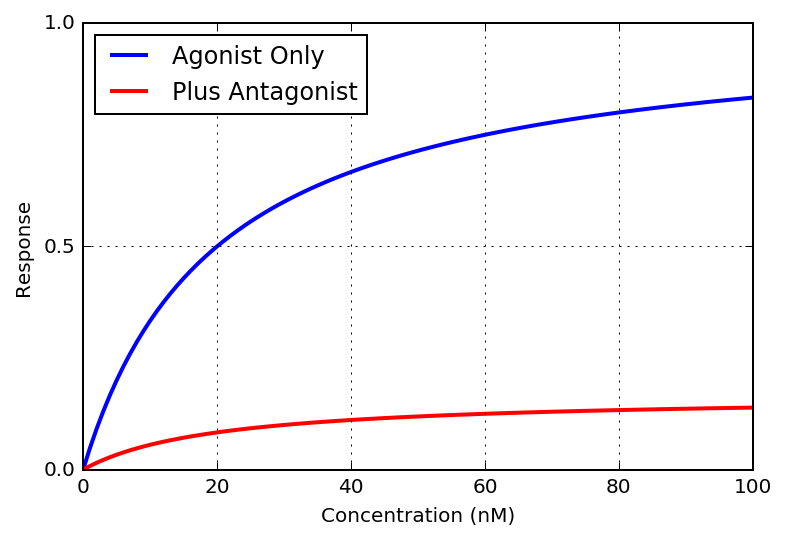

In [16]:
c = c_lin   # Drug concentration(s) in nanomolar (nM)
EC_50 = 20  # 50% effective concentration in nanomolar (nM)
F = 1       # Efficacy (unitless)
n_H = 1     # Hill coefficients (unitless)
r_a = calc_drr(c, EC_50, F, n_H)

K_i = 5     # Dissociation constant of inhibitor in nanomolar (nM)
c_i = 25    # Inhibitor concentration in nanomolar (nM)
r_ana = calc_drr_agonist_non_cptv_antagonist(c, EC_50, F, n_H, K_i, c_i)

plot_dose_response_relation(c, r_a, "Agonist Only", r_ana, "Plus Antagonist")

Following result shows drug response of agonist with noncompetitive antagonist to the logarithmically increased concentrations.

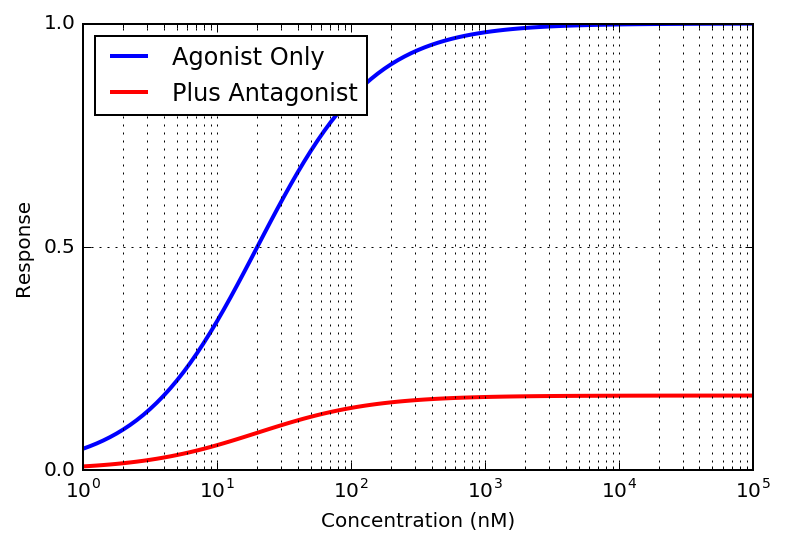

In [17]:
c = c_log   # Drug concentration(s) in nanomolar (nM)
EC_50 = 20  # 50% effective concentration in nanomolar (nM)
F = 1       # Efficacy (unitless)
n_H = 1     # Hill coefficients (unitless)
r_a = calc_drr(c, EC_50, F, n_H)

K_i = 5     # Dissociation constant of inhibitor in nanomolar (nM)
c_i = 25    # Inhibitor concentration in nanomolar (nM)
r_ana = calc_drr_agonist_non_cptv_antagonist(c, EC_50, F, n_H, K_i, c_i)

plot_dose_response_relation(c, r_a, "Agonist Only", r_ana, "Plus Antagonist", log_flag = True)

---

# Reference

1. Henry A. Lester, 2014. Drugs and the Brain. Week 2: Dose-response Relations. California Institute of Technology. Coursera. https://www.coursera.org/course/drugsandbrain